In [1]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())
import tensorflow as tf
print(tf.__version__)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14635352938856538297
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1587351552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12993432987473615005
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
2.10.1


In [2]:
import matplotlib.pyplot as plt

### Datasets generation

#### Clean Dataset

#### DatasetGenerator

In [3]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
img_path_train = "datasets/food-101/food-101/images/"


# train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
#                                   width_shift_range = 0.1,
#                                    height_shift_range = 0.1,
#                                    rotation_range = 20,
#                                    horizontal_flip = True)
train_datagen = ImageDataGenerator(rescale= 1.0/255, validation_split=0.2)


train_generator = train_datagen.flow_from_directory(img_path_train,
                                                    target_size=(24,24),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(img_path_train,
                                                    target_size=(24,24),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    subset='validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [4]:
sample_batch = train_generator.next()
sample_batch_test = validation_generator.next()

In [73]:
sample_batch[0][0, :, :, :].shape

(24, 24, 3)

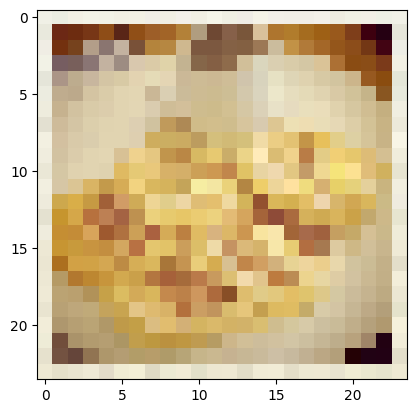

In [74]:
plt.imshow(sample_batch[0][0, :, :, :], cmap='gray')
plt.show()

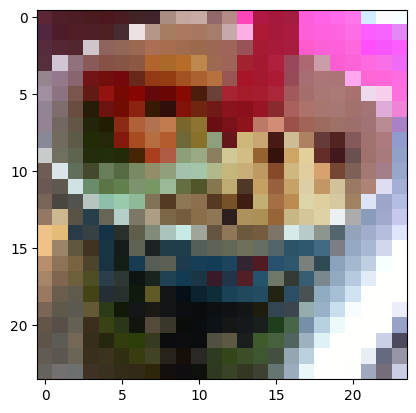

In [75]:
plt.imshow(sample_batch_test[0][0, :, :, :], cmap='gray')
plt.show()

### CNN Classifier model

In [80]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 101

# Initialising the CNN
model = Sequential()

#Convolution 1
model.add(Conv2D(64,(3,3), padding='same', input_shape=(24, 24, 3)))
model.add(Activation('relu'))

# #Convolution 2
# model.add(Conv2D(64,(3,3), padding='same', input_shape=(128, 128, 3)))
# model.add(Activation('relu'))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(Activation('relu'))

# model.add(Dense(nb_classes))
model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(learning_rate=0.001)
# model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        1792      
                                                                 
 activation_25 (Activation)  (None, 24, 24, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 36864)             0         
                                                                 
 dense_20 (Dense)            (None, 256)               9437440   
                                                                 
 activation_26 (Activation)  (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 101)               25957     
                                                                 
Total params: 9,465,189
Trainable params: 9,465,189
N

### Training

In [79]:
# number of epochs to train the NN
epochs = 1

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# with tf.device('/gpu:0'):
history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.n//validation_generator.batch_size,
    callbacks=callbacks_list
)

C:\Users\Emeze\AppData\Local\Temp\ipykernel_33404\972540206.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Emeze\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Emeze\AppData\Local\Temp\ipykernel_33404\972540206.py", line 10, in <module>
      history = model.fit_generator(
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2636, in fit_generator
      return self.fit(
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "c:\Users\Emeze\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [128,101] and labels shape [12928]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_8653]

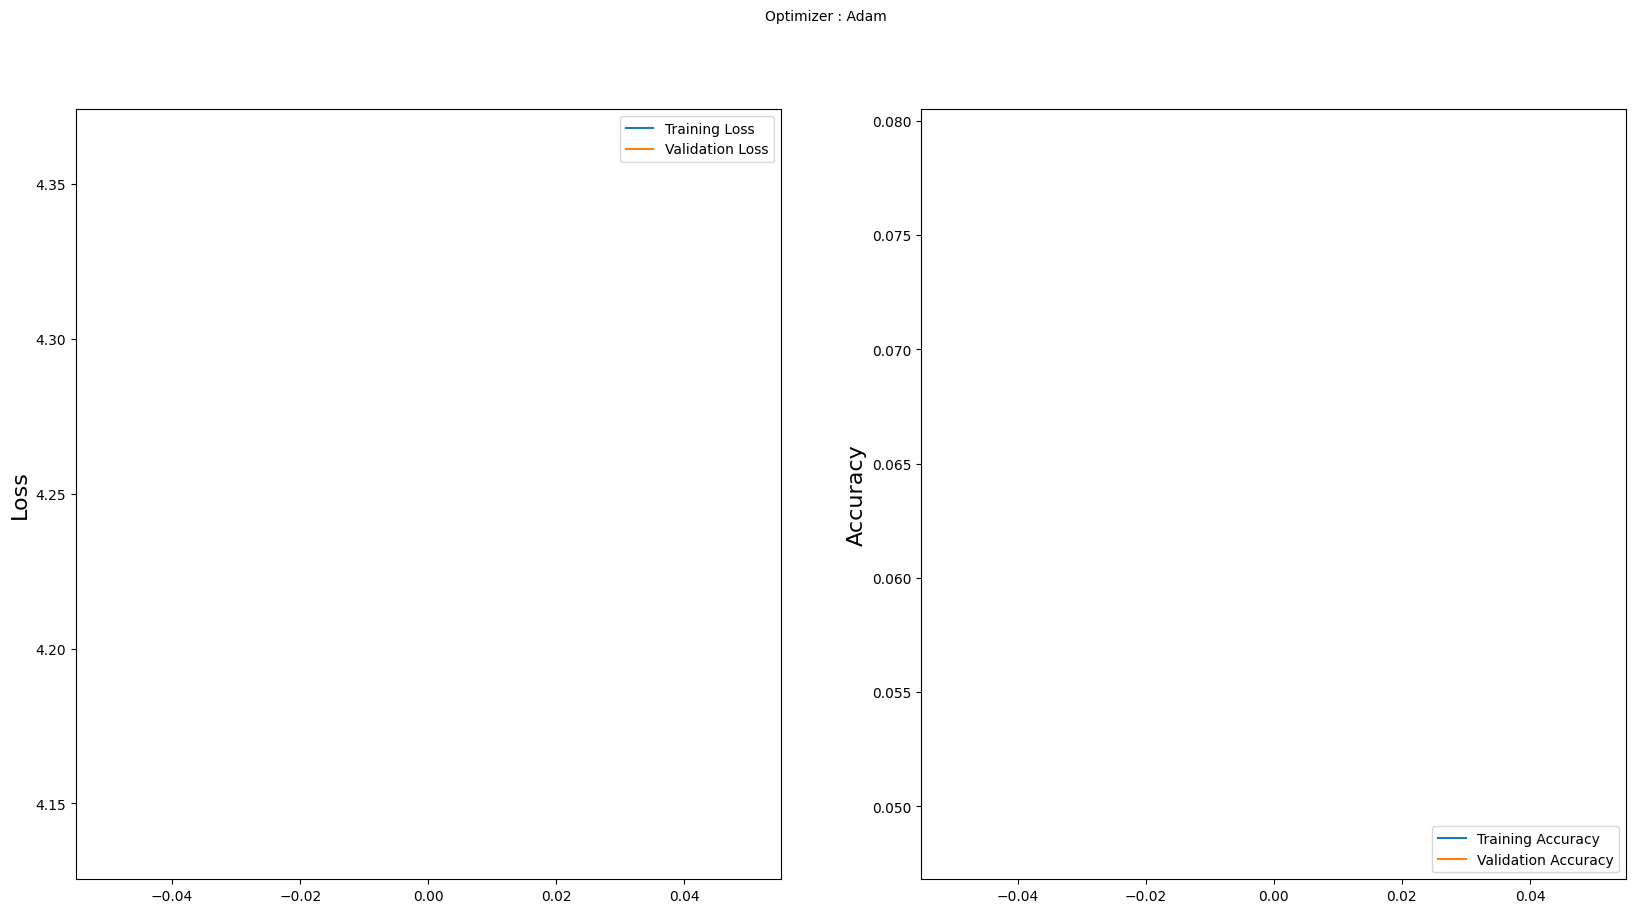

In [55]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [68]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/nutrition101 (1).csv')


list(df.iloc[np.argmax(model.predict(sample_batch[0][0:1, :, :, :])[0])])

1/1 [==============================] - 0s 31ms/step


[6, 'beignets', 5.46, 20.2, 53.7]